In [2]:
import pandas as pd
df = pd.read_csv('mdata.csv')

In [12]:
# from google.colab import drive
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier

# drive.mount('/content/drive')

In [3]:
#checking the dataframe
print(df.info())
print("\n")
print(df.describe())
print("\n")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93100 entries, 0 to 93099
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   elapsedTime         93100 non-null  int64  
 1    numEvents          93100 non-null  int64  
 2    actionType         93100 non-null  int64  
 3    numCriticalPoints  93100 non-null  int64  
 4   traveledDistance    93100 non-null  float64
 5    endToEndLine       93100 non-null  float64
 6    largestDeviation   93100 non-null  float64
 7    efficiency         93100 non-null  float64
 8    a_beg_time         93100 non-null  float64
 9    sum_of_angles      93100 non-null  float64
 10  avgv                93100 non-null  float64
 11    sdv               93100 non-null  float64
 12    minv              93100 non-null  float64
 13   maxv               93100 non-null  float64
 14  avgvx               93100 non-null  float64
 15   sdvx               93100 non-null  float64
 16   min

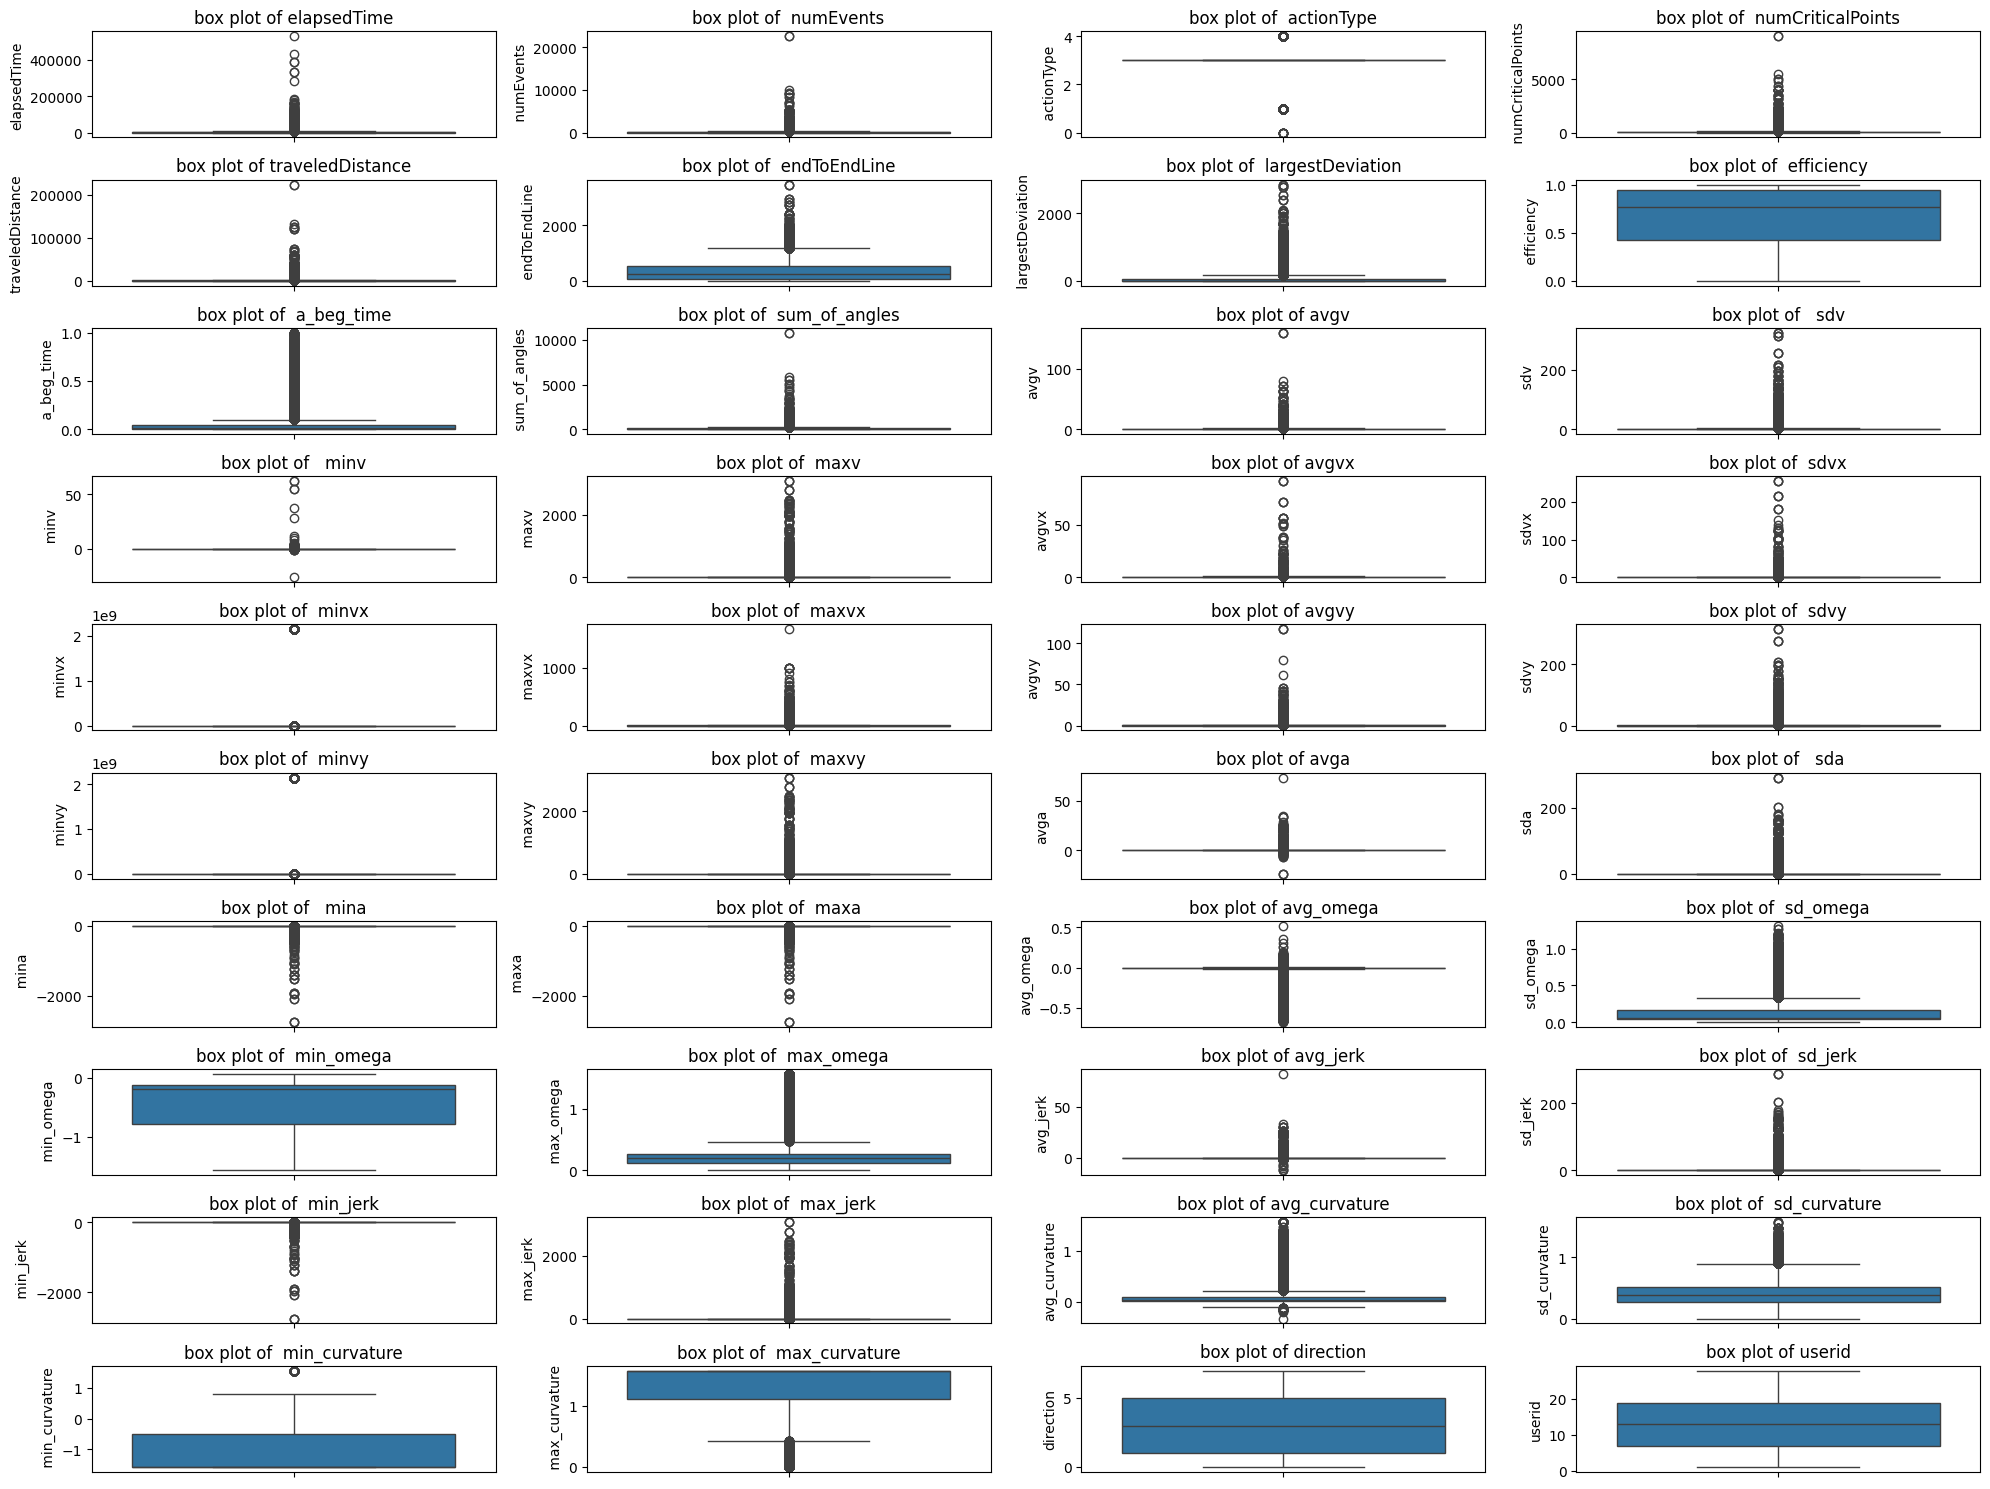

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

num_col = df.select_dtypes(include=['number']).columns

num_plots = len(num_col)
cols = 4
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(20, 15))
for i, j in enumerate(num_col):
    plt.subplot(rows, cols, i + 1)  # Use the calculated rows
    sns.boxplot(data=df, y=j)
    plt.title(f'box plot of {j}')

plt.tight_layout()
plt.show()

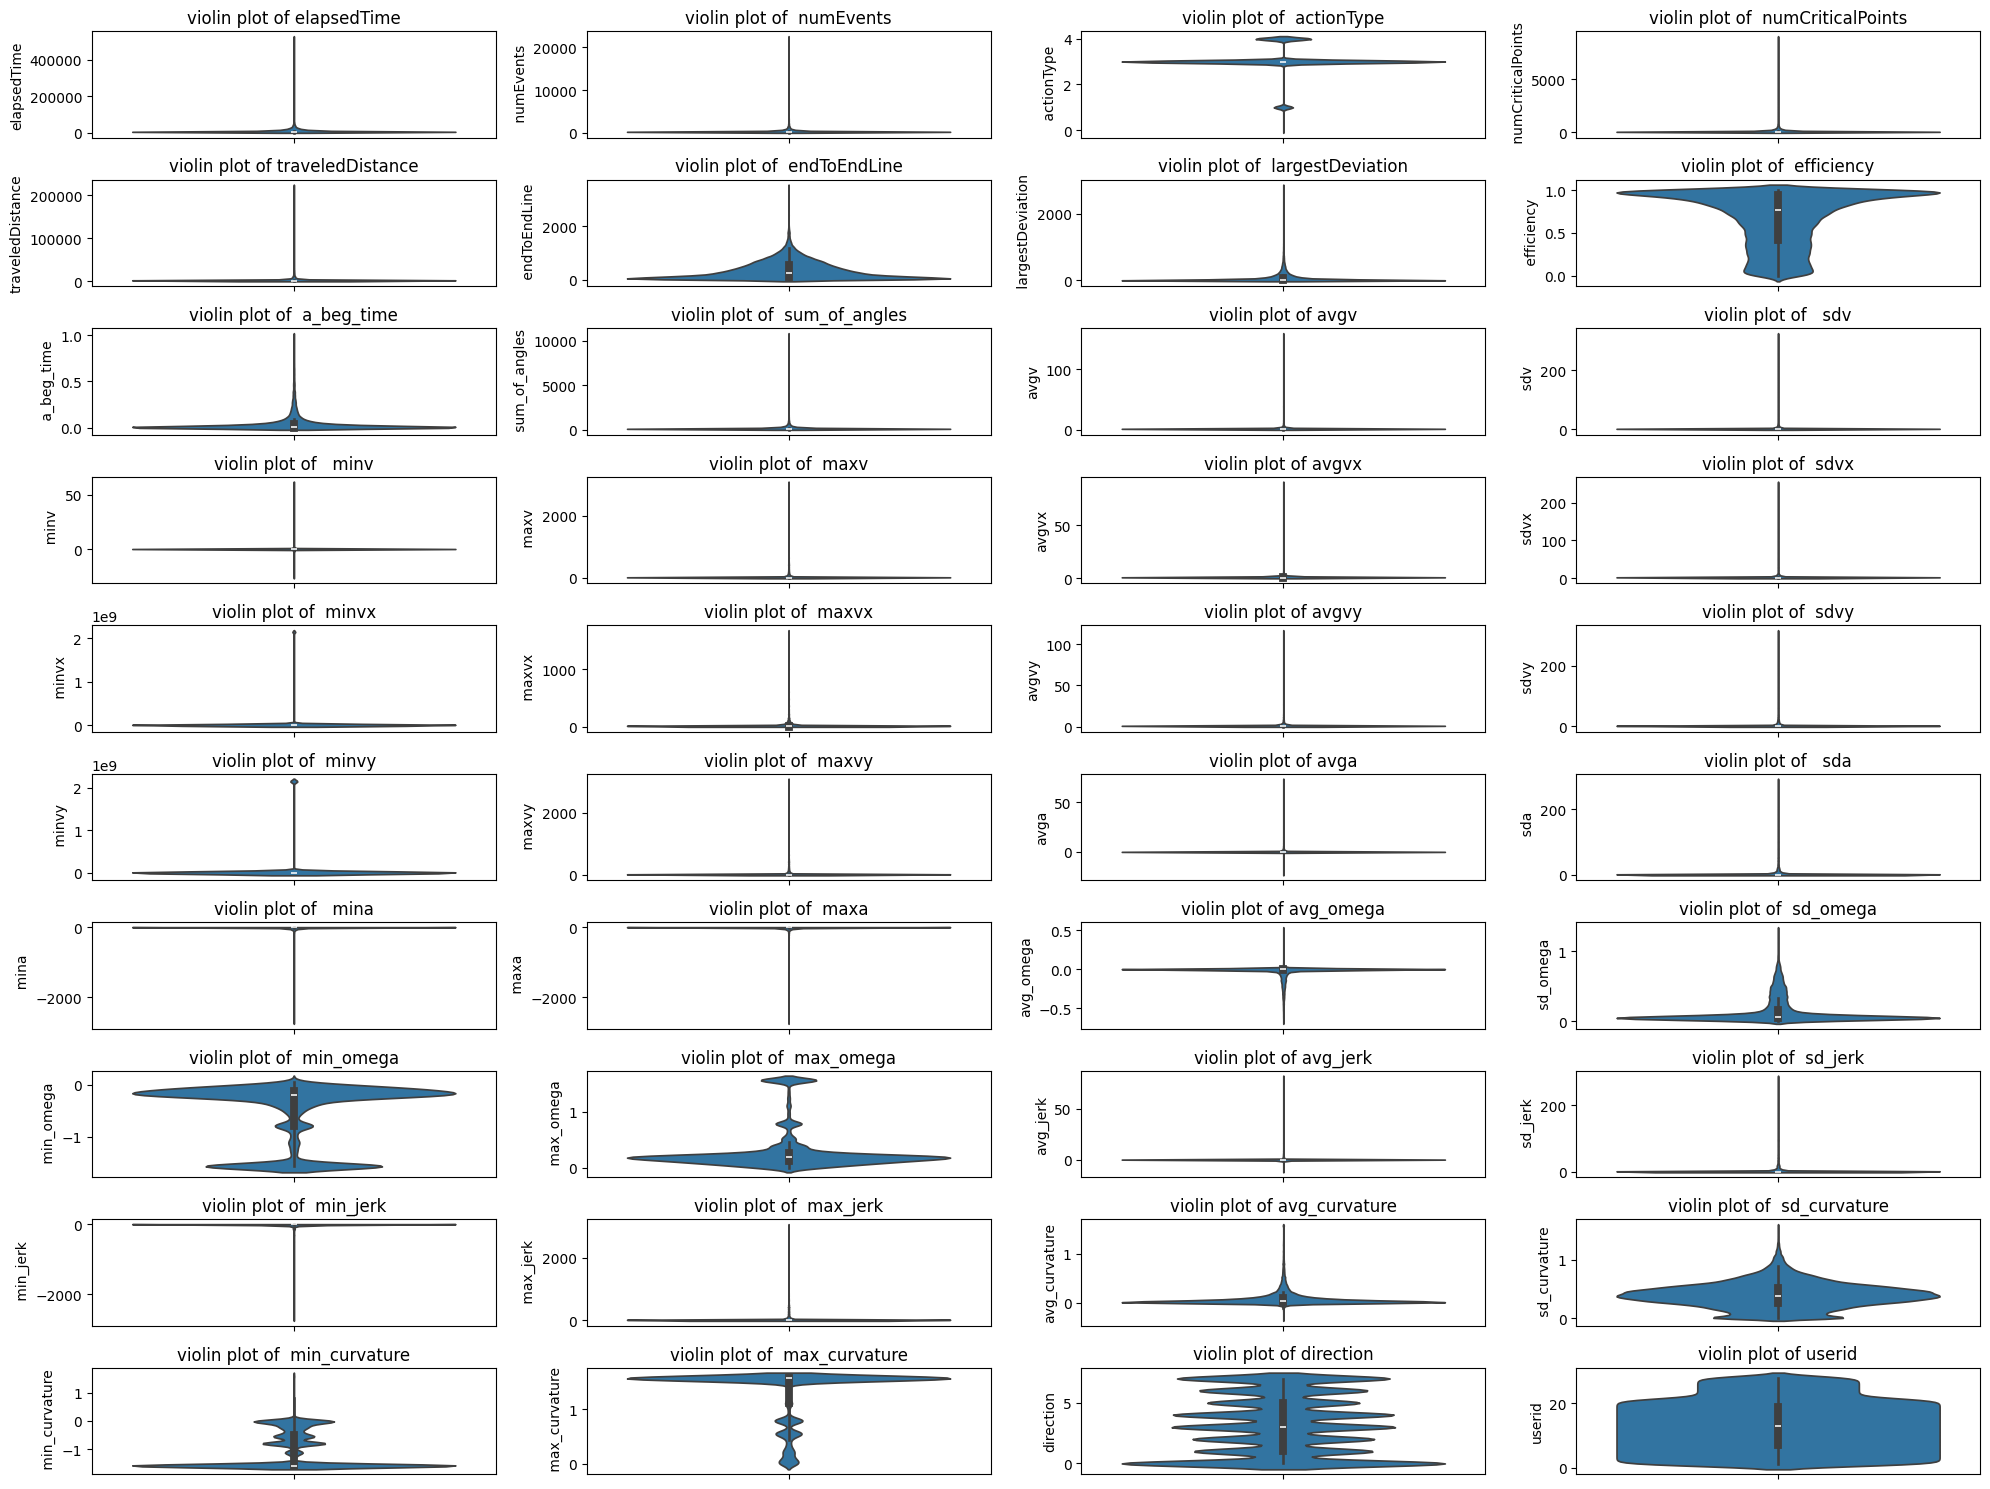

In [5]:
num_col = df.select_dtypes(include=['number']).columns  # Select numerical columns

num_plots = len(num_col)

cols = 4
rows = (num_plots + cols - 1) // cols

plt.figure(figsize=(20, 15))

for i, j in enumerate(num_col):
    plt.subplot(rows, cols, i + 1)  # calculated rows
    sns.violinplot(data=df, y=j)
    plt.title(f'violin plot of {j}')

plt.tight_layout()
plt.show()

In [6]:
cat_col = df.select_dtypes(include=['object']).columns  # Select categorical columns

plt.figure(figsize=(18, 12))
row, col = 2, 2  # no of plots in each row
for i, j in enumerate(cat_col):
    plt.subplot(row, col, i + 1)
    sns.countplot(data=df, x=j)
    plt.title(f'count plot of {j}')

plt.tight_layout()
plt.show()

<Figure size 1800x1200 with 0 Axes>

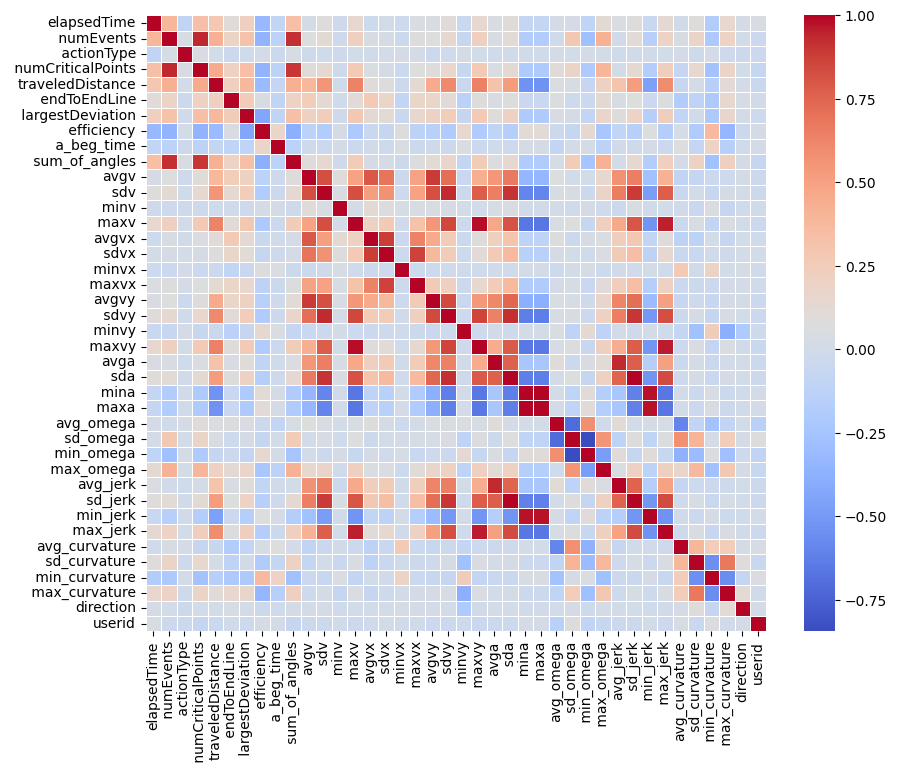

In [7]:
#correlation heatmap

plt.figure(figsize=(10,8))
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix,cmap='coolwarm',linewidths=0.5)
# plt.figure(figsize=(11.7, 8.27))
# sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True)
plt.show()


In [8]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Perceptron

def model_accuracy(X_train,y_train,X_test,y_test,model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return accuracy_score(y_test, y_pred)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000,random_state=42)
}

X = df.drop('userid', axis=1)
y = df['userid']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

for name,model in models.items():
  print("Accuracy for ",name,":")
  print(model_accuracy(X_train,y_train,X_test,y_test,model))



Accuracy for  Random Forest :
0.7929108485499463
Accuracy for  Logistic Regression :
0.17669172932330826


In [10]:
'''from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grids ={
    "Random Forest": {
        "n_estimators": [50, 100],
        "max_depth": [10, 20],
        "min_samples_split": [5, 10],
        "criterion": ["gini", "entropy"]
    },
}

tuned_models = {}

print(f"Performing RandomizedSearchCV for {name}...")
random_search = RandomizedSearchCV(
    estimator=models['Random Forest'],
    param_distributions=param_grids['Random Forest'],
    n_iter=50,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

tuned_models[name] = random_search.best_estimator_

print(f"Best parameters for {name}: {random_search.best_params_}")
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.2f}")
'''

'from sklearn.model_selection import RandomizedSearchCV\nimport numpy as np\n\nparam_grids ={\n    "Random Forest": {\n        "n_estimators": [50, 100],\n        "max_depth": [10, 20],\n        "min_samples_split": [5, 10],\n        "criterion": ["gini", "entropy"]\n    },\n}\n\ntuned_models = {}\n\nprint(f"Performing RandomizedSearchCV for {name}...")\nrandom_search = RandomizedSearchCV(\n    estimator=models[\'Random Forest\'],\n    param_distributions=param_grids[\'Random Forest\'],\n    n_iter=50,\n    cv=5,\n    scoring="accuracy",\n    n_jobs=-1,\n    random_state=42\n)\nrandom_search.fit(X_train, y_train)\n\ntuned_models[name] = random_search.best_estimator_\n\nprint(f"Best parameters for {name}: {random_search.best_params_}")\ny_pred = random_search.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy on test data: {accuracy:.2f}")\n'

In [13]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_pred, y_test))
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           1       0.12      0.10      0.11       874
           2       0.39      0.29      0.33      1037
           3       0.19      0.22      0.21       691
           4       0.45      0.59      0.51       556
           5       0.11      0.27      0.16       309
           6       0.13      0.19      0.16       526
           7       0.29      0.64      0.40       338
           8       0.26      0.13      0.17      1419
           9       0.25      0.13      0.17      1477
          10       0.18      0.16      0.17       899
          11       0.20      0.21      0.20       712
          12       0.24      0.17      0.20      1074
          13       0.05      0.13      0.08       311
          14       0.22      0.13      0.17      1282
          15       0.07      0.21      0.10       245
          16       0.07      0.21      0.10       242
          17       0.11      0.28      0.16       312
          18       0.41    

In [14]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_pred, y_test))

print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           1       0.19      0.21      0.20       654
           2       0.47      0.38      0.42       940
           3       0.20      0.33      0.25       469
           4       0.49      0.60      0.54       584
           5       0.25      0.41      0.31       454
           6       0.23      0.23      0.23       740
           7       0.34      0.60      0.43       423
           8       0.34      0.16      0.22      1527
           9       0.26      0.16      0.20      1287
          10       0.30      0.19      0.23      1244
          11       0.25      0.24      0.25       808
          12       0.25      0.24      0.25       803
          13       0.13      0.24      0.17       409
          14       0.21      0.16      0.18      1024
          15       0.13      0.26      0.17       359
          16       0.15      0.47      0.23       240
          17       0.16      0.29      0.21       455
          18       0.45    

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score


ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy', splitter='best'), n_estimators=100)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print(classification_report(y_pred, y_test))
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")





/Users/sunnydhaka/Downloads/sem7/ML/2021429_HW3/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.70      0.70      0.70       741
           2       0.81      0.81      0.81       763
           3       0.74      0.77      0.76       759
           4       0.82      0.79      0.81       756
           5       0.77      0.68      0.72       858
           6       0.72      0.68      0.70       771
           7       0.74      0.79      0.77       699
           8       0.80      0.79      0.79       743
           9       0.73      0.77      0.75       747
          10       0.73      0.73      0.73       801
          11       0.75      0.77      0.76       743
          12       0.73      0.74      0.74       764
          13       0.70      0.70      0.70       729
          14       0.70      0.73      0.72       745
          15       0.70      0.69      0.69       749
          16       0.80      0.80      0.80       765
          17       0.74      0.76      0.75       783
          18       0.79    

In [18]:
with open('adaboost_model.pkl', 'wb') as f:
    pickle.dump(ada, f)

In [ ]:
import numpy as np
import scipy.stats as stats

class UserAuthenticationConfidence:
    def __init__(self, model_accuracy, sample_size):
        """
        Initialize the confidence interval calculator for user authentication

        Parameters:
        - model_accuracy: The accuracy of the authentication model (as a decimal)
        - sample_size: Number of authentication attempts to analyze
        """
        self.model_accuracy = model_accuracy
        self.sample_size = sample_size

    def calculate_confidence_interval(self, confidence_level=0.95):
        """
        Calculate confidence interval for user authentication accuracy

        Parameters:
        - confidence_level: Desired confidence level (default 95%)

        Returns:
        - A tuple containing (lower bound, point estimate, upper bound)
        """
        # Point estimate is the model's accuracy
        point_estimate = self.model_accuracy

        # Calculate standard error
        standard_error = np.sqrt((point_estimate * (1 - point_estimate)) / self.sample_size)

        # Calculate z-score based on confidence level
        z_score = stats.norm.ppf((1 + confidence_level) / 2)

        # Calculate margin of error
        margin_of_error = z_score * standard_error

        # Calculate confidence interval
        lower_bound = max(0, point_estimate - margin_of_error)
        upper_bound = min(1, point_estimate + margin_of_error)

        return (lower_bound, point_estimate, upper_bound)

    def interpret_results(self, confidence_interval):
        """
        Provide an interpretation of the confidence interval

        Parameters:
        - confidence_interval: Tuple of (lower bound, point estimate, upper bound)

        Returns:
        - String interpretation of the results
        """
        lower, point, upper = confidence_interval

        interpretation = f"""
Authentication Confidence Analysis:
------------------------------------
Point Estimate: {point*100:.2f}%
Confidence Interval: [{lower*100:.2f}%, {upper*100:.2f}%]

Interpretation:
- We are 95% confident that the true authentication accuracy
  falls between {lower*100:.2f}% and {upper*100:.2f}%.
- Point Estimate suggests our model correctly identifies users
  {point*100:.2f}% of the time.
"""
        return interpretation

def main():
    # Example usage with the Random Forest model accuracy from the paper
    model_accuracy = 0.794  # 79.4% from Random Forest Classifier
    sample_size = 1000  # Example sample size, adjust based on your actual data

    # Create authentication confidence calculator
    auth_confidence = UserAuthenticationConfidence(model_accuracy, sample_size)

    # Calculate confidence interval
    confidence_interval = auth_confidence.calculate_confidence_interval()

    # Print interpretation
    print(auth_confidence.interpret_results(confidence_interval))

if __name__ == "__main__":
    main()

# MLP

In [23]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('mdata.csv')


X = df.drop('userid', axis=1)
y = df['userid']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    max_iter=500,  # Reduced max iterations
    activation='relu',  # ReLU activation function
    solver='adam',  # Adam optimizer
    random_state=42,
    early_stopping=True,  # Use early stopping to prevent overfitting
    validation_fraction=0.2  # Use 20% of training data for validation
)

# Fit the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Calculate detailed metrics
print("\nDetailed Performance Metrics:")
print("-" * 40)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision (average='weighted' to account for class imbalance)
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

# Recall (average='weighted' to account for class imbalance)
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

# F1 Score (average='weighted' to account for class imbalance)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Detailed Classification Report
print("\nDetailed Classification Report:")
print("-" * 40)
print(classification_report(y_test, y_pred))

# Print model details
print("\nModel Architecture:")
print(f"Hidden Layers: {mlp.hidden_layer_sizes}")
print(f"Activation Function: {mlp.activation}")
print(f"Solver: {mlp.solver}")
print(f"Number of Iterations: {mlp.n_iter_}")
print(f"Final Loss: {mlp.loss_}")


Detailed Performance Metrics:
----------------------------------------
Accuracy: 0.3702
Precision: 0.3743
Recall: 0.3702
F1 Score: 0.3680

Detailed Classification Report:
----------------------------------------
              precision    recall  f1-score   support

           1       0.30      0.30      0.30       746
           2       0.54      0.57      0.55       767
           3       0.35      0.51      0.42       792
           4       0.55      0.51      0.53       724
           5       0.42      0.32      0.37       758
           6       0.29      0.27      0.28       737
           7       0.48      0.49      0.49       744
           8       0.41      0.50      0.45       735
           9       0.24      0.36      0.29       788
          10       0.34      0.36      0.35       799
          11       0.35      0.37      0.36       760
          12       0.36      0.32      0.33       773
          13       0.24      0.24      0.24       728
          14       0.29      0

In [24]:
with open('MLP_model.pkl', 'wb') as f:
    pickle.dump(mlp, f)